In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv("drug200.csv")
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
data.shape

(200, 6)

In [5]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [13]:
data[data.duplicated()]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


Sex
M    104
F     96
Name: count, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


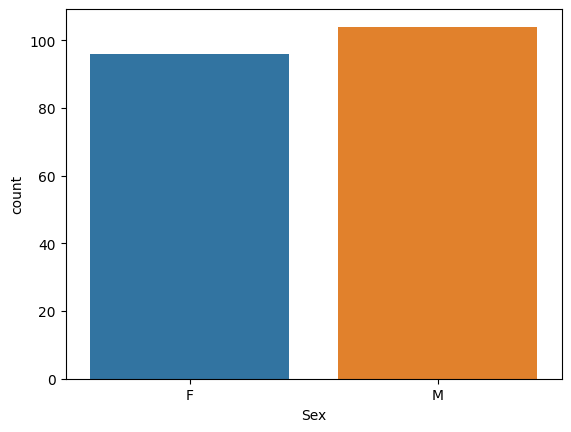

In [30]:
x = data.Sex.value_counts()
print(x)
sns.countplot(data, x = 'Sex')
plt.show()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


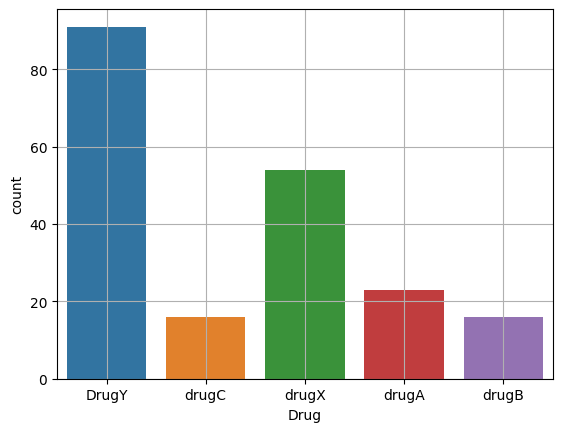

In [29]:
x = data.Drug.value_counts()
print(x)
sns.countplot(data, x = 'Drug')
plt.grid()
plt.show()

In [31]:
data.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [32]:
data.Drug.nunique()

5

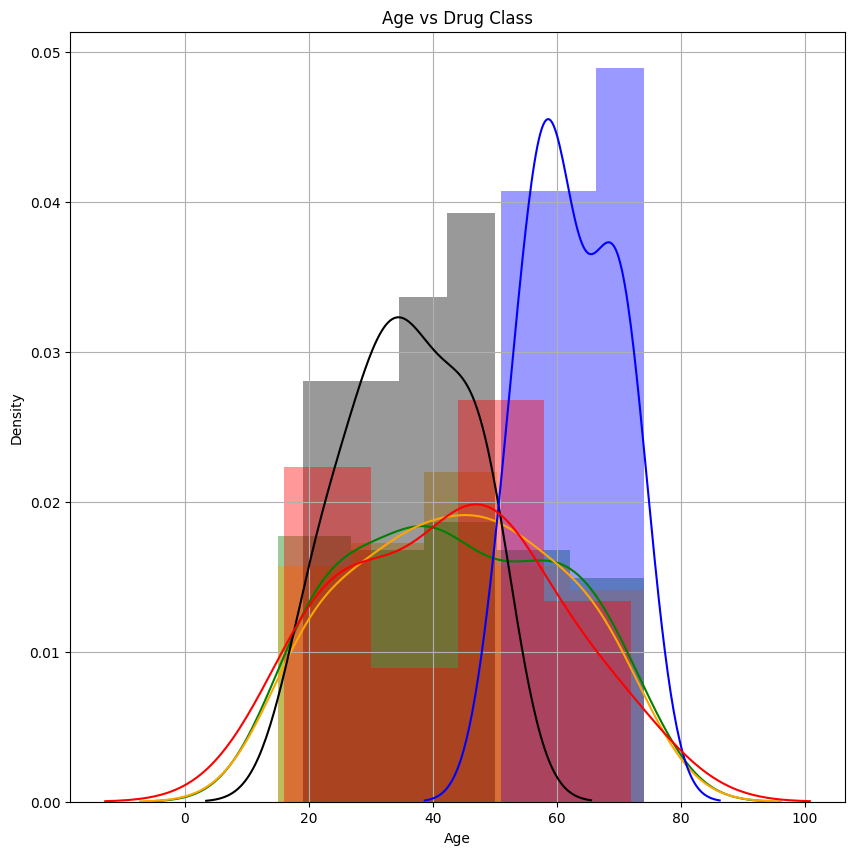

In [40]:
plt.figure(figsize=(10,10))
sns.distplot(data[data.Drug == 'DrugY']['Age'], color = 'green')
sns.distplot(data[data.Drug == 'drugX']['Age'], color = 'orange')
sns.distplot(data[data.Drug == 'drugA']['Age'], color = 'black')
sns.distplot(data[data.Drug == 'drugB']['Age'], color = 'blue')
sns.distplot(data[data.Drug == 'drugC']['Age'], color = 'red')
plt.title('Age vs Drug Class')
plt.grid()
plt.show()

In [42]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
data['BP'] = oe.fit_transform(data[['BP']])
data['Cholesterol'] = oe.fit_transform(data[['Cholesterol']])
data['Sex'] = oe.fit_transform(data[['Sex']])
data['Drug'] = oe.fit_transform(data[['Drug']])

In [44]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,0.0,0.0,25.355,0.0
1,47,1.0,1.0,0.0,13.093,3.0
2,47,1.0,1.0,0.0,10.114,3.0
3,28,0.0,2.0,0.0,7.798,4.0
4,61,0.0,1.0,0.0,18.043,0.0
...,...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567,3.0
196,16,1.0,1.0,0.0,12.006,3.0
197,52,1.0,2.0,0.0,9.894,4.0
198,23,1.0,2.0,1.0,14.020,4.0


In [47]:
# vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in list(data.columns):
    if ((data[col].dtypes != 'object') & (col != 'TenYearCHD')):
        col_list.append(col)
X = data[col_list]
vif_df = pd.DataFrame()
vif_df['Features'] = X.columns
vif_df['vif'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_df

,Features,vif
0,Age,6.144297
1,Sex,2.008590
2,BP,2.949695
3,Cholesterol,1.982990
4,Na_to_K,5.024383
5,Drug,3.024965


In [51]:
X = pd.DataFrame(data.iloc[:,0:5])
y = pd.DataFrame(data.iloc[:,-1])

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [53]:
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
79,32,0.0,1.0,1.0,10.840
197,52,1.0,2.0,0.0,9.894
38,39,0.0,2.0,1.0,9.709
24,33,0.0,1.0,0.0,33.486
122,34,1.0,2.0,0.0,22.456
...,...,...,...,...,...
106,22,1.0,2.0,0.0,11.953
14,50,0.0,2.0,0.0,12.703
92,29,0.0,0.0,0.0,29.450
179,67,0.0,2.0,0.0,15.891


In [54]:
y_train

,Drug
79,4.0
197,4.0
38,4.0
24,0.0
122,0.0
...,...
106,4.0
14,4.0
92,0.0
179,0.0


In [55]:
X_test

,Age,Sex,BP,Cholesterol,Na_to_K
95,36,1.0,1.0,1.0,11.424
15,16,0.0,0.0,1.0,15.516
30,18,0.0,2.0,1.0,8.750
158,59,0.0,1.0,0.0,10.444
128,47,1.0,1.0,1.0,33.542
115,51,1.0,0.0,0.0,18.295
69,18,0.0,0.0,1.0,24.276
170,28,0.0,2.0,0.0,12.879
174,42,1.0,0.0,1.0,12.766
45,66,0.0,2.0,1.0,8.107


In [56]:
y_test

,Drug
95,4.0
15,0.0
30,4.0
158,3.0
128,0.0
115,0.0
69,0.0
170,4.0
174,1.0
45,4.0


In [63]:
from sklearn.tree import DecisionTreeClassifier
gini = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [64]:
y_pred = gini.predict(X_test)

In [65]:
y_pred

array([4., 0., 4., 3., 0., 0., 0., 4., 1., 4., 1., 4., 0., 1., 2., 0., 2.,
       4., 3., 0., 2., 4., 4., 0., 0., 0., 3., 4., 0., 4., 0., 3., 3., 0.,
       1., 0., 4., 1., 0., 1.])

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

1.0

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[15,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  5],
       [ 0,  0,  0,  0, 11]])

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00         6
         2.0       1.00      1.00      1.00         3
         3.0       0.00      0.00      0.00         5
         4.0       0.69      1.00      0.81        11

    accuracy                           0.88        40
   macro avg       0.74      0.80      0.76        40
weighted avg       0.79      0.88      0.82        40



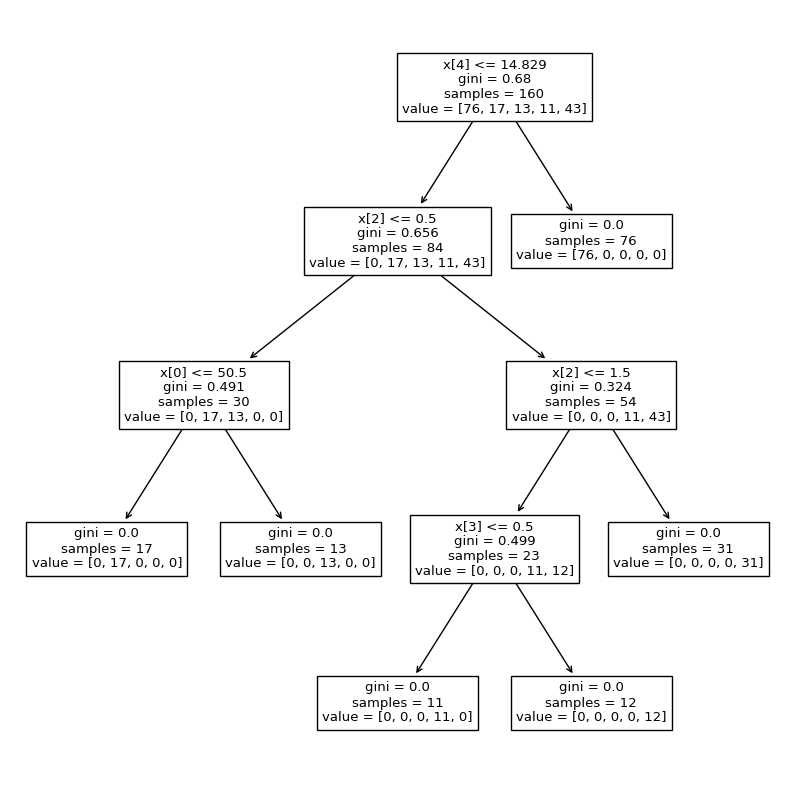

In [68]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(gini.fit(X_train,y_train))
plt.show()

In [69]:
from sklearn.tree import DecisionTreeClassifier
entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 3)
entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [70]:
y_pred = entropy.predict(X_test)
y_pred

array([4., 0., 4., 4., 0., 0., 0., 4., 1., 4., 1., 4., 0., 1., 2., 0., 2.,
       4., 4., 0., 2., 4., 4., 0., 0., 0., 4., 4., 0., 4., 0., 4., 4., 0.,
       1., 0., 4., 1., 0., 1.])

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.875

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[15,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  5],
       [ 0,  0,  0,  0, 11]])

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00         6
         2.0       1.00      1.00      1.00         3
         3.0       0.00      0.00      0.00         5
         4.0       0.69      1.00      0.81        11

    accuracy                           0.88        40
   macro avg       0.74      0.80      0.76        40
weighted avg       0.79      0.88      0.82        40



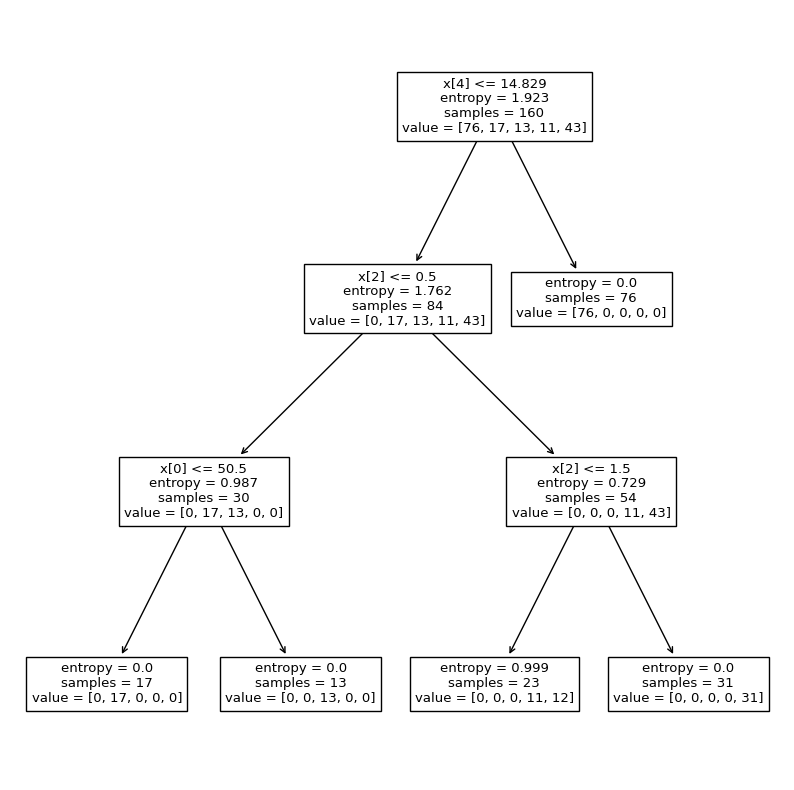

In [76]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(entropy.fit(X_train,y_train))
plt.show()